<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/230707_3ways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모델만드는 3가지 방법
## sequential
## funtion api
## class

In [57]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [58]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [60]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### 검정데이터

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [62]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 정규화

정규화할때 왜 항상 255를 나누는지

In [63]:
X_train = X_train/255.
X_val = X_val/255.
X_test = X_test/255.

### 타겟값 onehotencoding

In [64]:
# y_train_o = tf.keras.utils.to_categorical(y_train)
# y_val_o = tf.keras.utils.to_categorical(y_val)
# y_test_o = tf.keras.utils.to_categorical(y_test)

In [65]:
# 모델 차원 맞추기
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

### 모델 구성

In [66]:
def build_model_1():
  model = keras.Sequential([
      layers.Conv2D(32,3,activation='relu', input_shape=(28,28,1)), # 마지막 차원은 컬러는 3, 흑백은 1
      layers.MaxPool2D(2),
      layers.Conv2D(64,3, activation='relu'),
      layers.MaxPool2D(2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy'
  )
  return model

In [67]:
model = build_model_1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

### 학습

In [68]:
Epochs = 10
Batch = 64

history = model.fit(
    X_train, y_train,
    epochs=Epochs,
    batch_size=Batch,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
750/750 [==============================] - 49s 64ms/step - loss: 0.4917 - val_loss: 0.3725
Epoch 2/10
750/750 [==============================] - 49s 66ms/step - loss: 0.3297 - val_loss: 0.3062
Epoch 3/10
750/750 [==============================] - 51s 68ms/step - loss: 0.2829 - val_loss: 0.3315
Epoch 4/10
750/750 [==============================] - 49s 65ms/step - loss: 0.2501 - val_loss: 0.2863
Epoch 5/10
750/750 [==============================] - 48s 63ms/step - loss: 0.2205 - val_loss: 0.2596
Epoch 6/10
750/750 [==============================] - 48s 65ms/step - loss: 0.1977 - val_loss: 0.2614
Epoch 7/10
750/750 [==============================] - 50s 66ms/step - loss: 0.1784 - val_loss: 0.2486
Epoch 8/10
750/750 [==============================] - 47s 63ms/step - loss: 0.1589 - val_loss: 0.2492
Epoch 9/10
750/750 [==============================] - 48s 64ms/step - loss: 0.1398 - val_loss: 0.2585
Epoch 10/10
750/750 [==============================] - 50s 66ms/step - loss: 0.122

In [69]:
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [70]:
y_pred[:5]

array([[9.6421058e-09, 1.4582108e-09, 4.0098791e-09, 6.0151453e-09,
        2.1293615e-10, 3.3912987e-05, 9.2269703e-10, 5.8100622e-06,
        1.5698981e-10, 9.9996024e-01],
       [9.8446953e-06, 1.0825451e-12, 9.9959761e-01, 1.0069494e-08,
        3.9122766e-04, 3.3200149e-13, 1.3262876e-06, 3.4492415e-13,
        3.7501242e-11, 1.2338912e-11],
       [4.1335808e-14, 9.9999994e-01, 4.6209548e-15, 1.4439604e-15,
        4.8531953e-19, 6.2959493e-19, 3.0567209e-17, 4.2234483e-28,
        2.1579964e-15, 3.2727245e-23],
       [1.5873722e-11, 9.9999994e-01, 1.9983518e-13, 4.0801316e-12,
        5.6578511e-14, 5.2520867e-17, 2.8440592e-12, 1.2267043e-21,
        1.3983024e-14, 5.3864615e-20],
       [4.0061656e-01, 2.1264006e-07, 3.3363388e-03, 2.6327185e-04,
        2.0831030e-02, 5.5074264e-07, 5.7494903e-01, 9.3235093e-07,
        2.4217059e-08, 1.9629517e-06]], dtype=float32)

### Function api

In [74]:
from tensorflow.keras.models import Model

def build_model_2():
  inp = layers.Input(shape=(28,28,1))
  x0 = layers.Conv2D(32,3,activation='relu')(inp)
  x1 = layers.MaxPool2D(2)(x0)
  x2 = layers.Conv2D(32,3,activation='relu')(x1)
  x3 = layers.MaxPool2D(2)(x2)
  x4 = layers.Flatten()(x3)
  x5 = layers.Dense(256, activation='relu')(x4)
  out = layers.Dense(10, activation='softmax')(x5)

  model = Model(inputs=inp, outputs=out)

  model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy'
  )

  return model

In [75]:
model = build_model_2()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 800)               0     

In [76]:
inputX = layers.Input(shape=(16,))
x1 = layers.Dense(8, activation='relu')(inputX)
x2 = layers.Dense(16, activation='relu')(x1)
x3 = Model(inputs=inputX, outputs=x2)

inputY = layers.Input(shape=(16,))
x4 = layers.Dense(8, activation='relu')(inputY)
x5 = layers.Dense(16, activation='relu')(x4)
x6 = Model(inputs=inputY, outputs=x5)

combined = layers.concatenate([x3.output, x6.output])
z1 = layers.Dense(2, activation='relu')(combined)
z2 = layers.Dense(1)(z1)

model = Model(inputs=[x3.input, x6.input],outputs=z2)

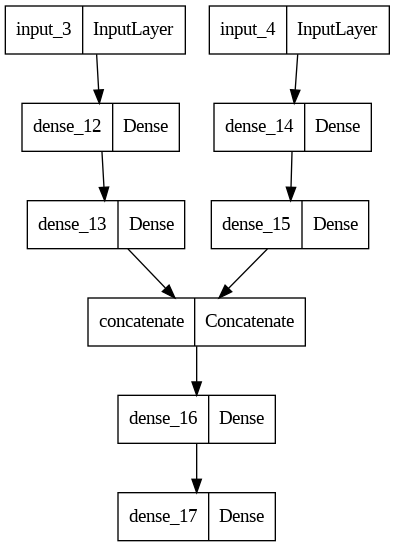

In [78]:
tf.keras.utils.plot_model(model)

### class(서브클래싱)

In [79]:
# 모델을 클래스로 만들기

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = tf.keras.layers.Conv2D(16, 3, activation='relu')
    self.conv2 = tf.keras.layers.Conv2D(32, 3, activation='relu')
    self.conv3 = tf.keras.layers.Conv2D(64, 3, activation='relu')
    self.pool = tf.keras.layers.MaxPooling2D((2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(32, activation='relu')
    self.d2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.conv3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [80]:
model = MyModel()
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy'
)

In [81]:
Epochs = 10
Batch = 64

history = model.fit(
    X_train, y_train,
    epochs=Epochs,
    batch_size=Batch,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/10
750/750 [==============================] - 27s 35ms/step - loss: 0.6732 - val_loss: 0.4797
Epoch 2/10
750/750 [==============================] - 27s 36ms/step - loss: 0.4355 - val_loss: 0.4060
Epoch 3/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3648 - val_loss: 0.3499
Epoch 4/10
750/750 [==============================] - 26s 35ms/step - loss: 0.3257 - val_loss: 0.3185
Epoch 5/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2989 - val_loss: 0.3050
Epoch 6/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2803 - val_loss: 0.3059
Epoch 7/10
750/750 [==============================] - 26s 34ms/step - loss: 0.2634 - val_loss: 0.2836
Epoch 8/10
750/750 [==============================] - 26s 35ms/step - loss: 0.2482 - val_loss: 0.2796
Epoch 9/10
750/750 [==============================] - 26s 34ms/step - loss: 0.2356 - val_loss: 0.2909
Epoch 10/10
750/750 [==============================] - 27s 36ms/step - loss: 0.224

# yolo5 custom objects

## fine tuning

In [83]:
!curl -L "https://public.roboflow.com/ds/mGme2MXOo2?key=16JC1q1bzP" > roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   1625      0 --:--:-- --:--:-- --:--:--  1625
100 11.5M  100 11.5M    0     0  14.2M      0 --:--:-- --:--:-- --:--:--  105M


In [84]:
!unzip /content/roboflow.zip

Archive:  /content/roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: export/
   creating: export/images/
 extracting: export/images/raccoon-100_jpg.rf.YWIftfgUdZqJLTkvI9W2.jpg  
 extracting: export/images/raccoon-101_jpg.rf.ebfr15yC06H7KdSNWJkC.jpg  
 extracting: export/images/raccoon-102_jpg.rf.Vtizg4N4D1Wn9fv4sBaJ.jpg  
 extracting: export/images/raccoon-103_jpg.rf.yx4ScGFA2FZ23qfitAfV.jpg  
 extracting: export/images/raccoon-104_jpg.rf.HdpZVmq1teO4b2ny0HJO.jpg  
 extracting: export/images/raccoon-105_jpg.rf.S4P0w34qeFrLIhNIHmuD.jpg  
 extracting: export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvbYSErKC.jpg  
 extracting: export/images/raccoon-107_jpg.rf.pQbBB9zNruyNhePH5B52.jpg  
 extracting: export/images/raccoon-108_jpg.rf.qFSgit2nhskdamOaI6Nm.jpg  
 extracting: export/images/raccoon-109_jpg.rf.LzEfJ28WbPo5OxpukIGd.jpg  
 extracting: export/images/raccoon-10_jpg.rf.umSu38h2FUXMMT9rANBV.jpg  
 ex

## model 가져오기

In [86]:
!pwd

/content


In [90]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15814 (delta 9), reused 26 (delta 2), pack-reused 15769
Receiving objects: 100% (15814/15814), 14.59 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.


In [91]:
%cd /content/yolov5

/content/yolov5


In [93]:
!pip install -r /content/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 625.9/625.9 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [94]:
%cd /

/


In [95]:
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')

In [96]:
img_list[:10]

['/content/dataset/export/images/raccoon-87_jpg.rf.Mii8qqnFvQSvnNjeka0P.jpg',
 '/content/dataset/export/images/raccoon-144_jpg.rf.BsojHoPGoxD11h7QIylE.jpg',
 '/content/dataset/export/images/raccoon-50_jpg.rf.whvFMBzgHg3ts3amHFfP.jpg',
 '/content/dataset/export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvbYSErKC.jpg',
 '/content/dataset/export/images/raccoon-151_jpg.rf.5QM6WsoL5TPMyAnE0exp.jpg',
 '/content/dataset/export/images/raccoon-20_jpg.rf.4WAs8L29reqeirSqGg9t.jpg',
 '/content/dataset/export/images/raccoon-157_jpg.rf.sFXF3Byt99UCrAC39stv.jpg',
 '/content/dataset/export/images/raccoon-143_jpg.rf.MJwGepEt8iJgbqjol0sN.jpg',
 '/content/dataset/export/images/raccoon-86_jpg.rf.qxniBkdMh5L4p6IDfKmJ.jpg',
 '/content/dataset/export/images/raccoon-16_jpg.rf.B7mRyX2zKgmj4GfdTHCu.jpg']

In [97]:
from sklearn.model_selection import train_test_split

train_img, val_img = train_test_split(img_list, test_size=0.2)

In [98]:
# 파일 이릠나 들어있는 txt파일만들기
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img) + '\n')

In [99]:
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(train_img) + '\n')

In [100]:
# data.yaml 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['raccoon']}


In [101]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

In [102]:
with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

In [103]:
%cd /content/yolov5

/content/yolov5


In [104]:
%%time

!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weight yolov5s.pt --name racoon_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=racoon_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

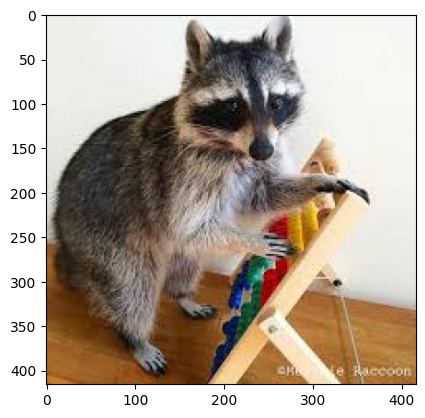

In [105]:
# /content/dataset/export/images/raccoon-64_jpg.rf.Mg6mwuhmKMgoUxIlT6jV.jpg
import PIL
import matplotlib.pyplot as plt

image_path = '/content/dataset/test/images/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg'
image = PIL.Image.open(image_path)
plt.imshow(image)
plt.show()

In [106]:
!python detect.py  --weights /content/yolov5/runs/train/racoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source "{image_path}"

detect: weights=['/content/yolov5/runs/train/racoon_yolov5s/weights/best.pt'], source=/content/dataset/test/images/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/test/images/raccoon-58_jpg.rf.ff9de9977475e0086e7ab582122c5167.jpg: 416x416 1 raccoon, 160.9ms
Speed: 3.4ms pre-process, 160.9ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp